##    Skills Updates Virtual Internship Assignment
TASK: Predicting students grade using python

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import seaborn as sns
import cufflinks as cf

In [2]:
df = pd.read_csv("student-mat.csv")

In [3]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
print('Total number of students:',len(df))

Total number of students: 395


In [9]:
df.size

13035

In [10]:
df.shape

(395, 33)

In [11]:
df['G1'].describe()

count    395.000000
mean      10.908861
std        3.319195
min        3.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64

In [12]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [16]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [19]:
cf.go_offline()

In [20]:
df.iplot()

In [23]:
df.iplot(kind='scatter',x='age',y='G3',mode='markers',size=8)

In [24]:
df.iplot(kind='box')

In [25]:
df['G3'].iplot(kind='hist',bins=100,color='blue')

### Data Visualization

<AxesSubplot:>

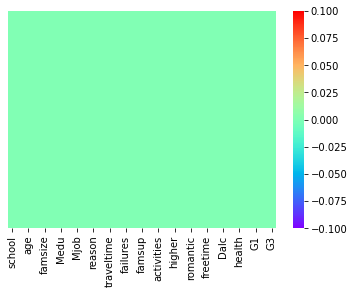

In [26]:
# To check any null values present in dataset pictorially
sns.heatmap(df.isnull(),cmap="rainbow",yticklabels=False)

<AxesSubplot:>

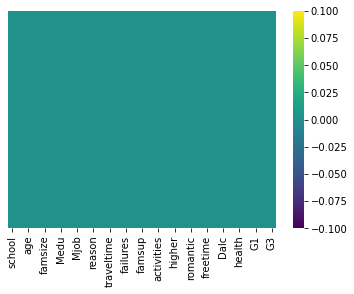

In [28]:
sns.heatmap(df.isnull(),cmap="viridis",yticklabels=False)    # Map color - viridis

    ** There are no null values in the given dataset

### Student's Sex

In [30]:
df_f = len(df[df['sex'] == 'F'])    # Number of female students
print('Number of female students:',df_f)
df_m = len(df[df['sex'] == 'M'])    # Number of male students
print('Number of male students:',df_m)

Number of female students: 208
Number of male students: 187


<AxesSubplot:xlabel='sex', ylabel='count'>

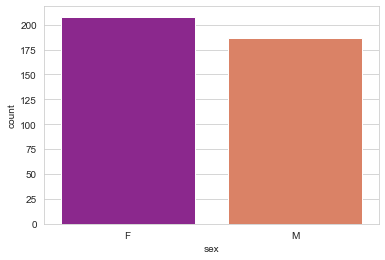

In [31]:
sns.set_style('whitegrid')    # male & female student representaion on countplot
sns.countplot(x='sex',data=df,palette='plasma')

### Age of Students

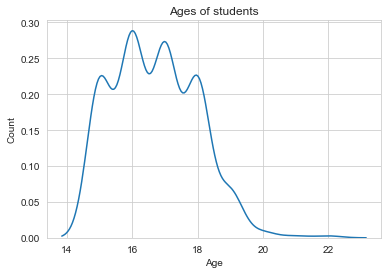

In [32]:
b = sns.kdeplot(df['age'])    # Kernel Density Estimations
b.axes.set_title('Ages of students')
b.set_xlabel('Age')
b.set_ylabel('Count')
plt.show()

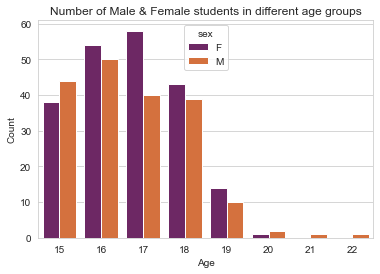

In [33]:
b = sns.countplot(x='age',hue='sex', data=df, palette='inferno')
b.axes.set_title('Number of Male & Female students in different age groups')
b.set_xlabel("Age")
b.set_ylabel("Count")
plt.show()

    **The student age seems to be ranging from 15-19, where gender distribution is pretty even in each age group.
    **The age group above 19 may be outliers, year back students or droupouts.

### Students from Urban & Rural Areas

In [34]:
df_u = len(df[df['address'] == 'U'])    # Number of urban areas students
print('Number of Urban students:',df_u)
df_r = len(df[df['address'] == 'R'])    # Number of rural areas students
print('Number of Rural students:',df_r)

Number of Urban students: 307
Number of Rural students: 88


<AxesSubplot:xlabel='address', ylabel='count'>

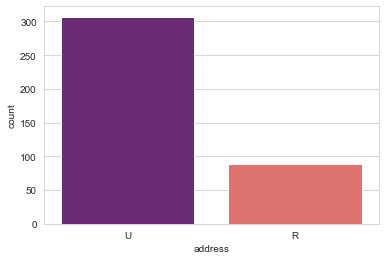

In [35]:
sns.set_style('whitegrid')
sns.countplot(x='address',data=df,palette='magma')    # urban & rural representaion on countplot

    **Approximately 77.72% students come from urban region and 22.28% from rural region.

<AxesSubplot:xlabel='address', ylabel='count'>

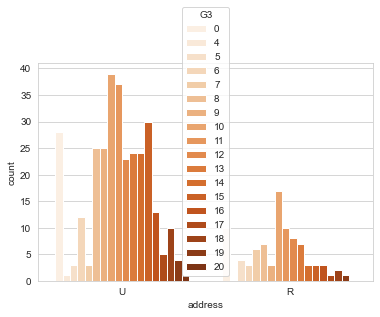

In [39]:
sns.countplot(x='address',hue='G3',data=df,palette='Oranges')

## EDA - Exploratory Data Analysis

1. Does age affect final grade?

Text(0.5, 1.0, 'Age vs Final Grade')

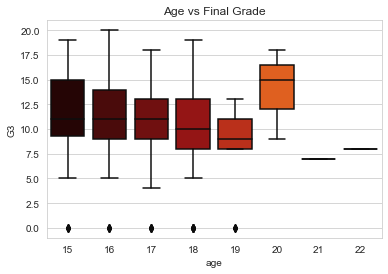

In [40]:
b= sns.boxplot(x='age', y='G3',data=df,palette='gist_heat')
b.axes.set_title('Age vs Final Grade')

    **Plotting the distribution rather than statistics would help us better understand the data.
    **The above plot shows that the median grades of the three age groups(15,16,17) are similar. Note the skewness of age group 19. (may be due to sample size). Age group 20 seems to score highest grades among all.

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



Text(0.5, 1.0, 'Does age affect final grade?')

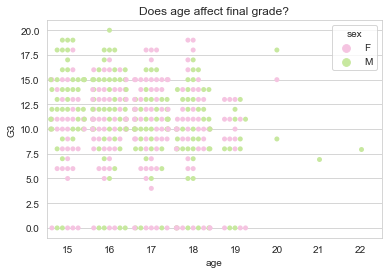

In [41]:
b = sns.swarmplot(x='age', y='G3',hue='sex', data=df,palette='PiYG')
b.axes.set_title('Does age affect final grade?')

2. Do urban students perform better than rural students?

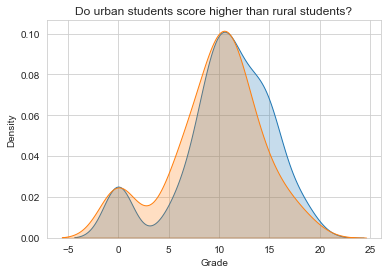

In [43]:
# Grade distribution by address
sns.kdeplot(df.loc[df['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(df.loc[df['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?')
plt.xlabel('Grade');
plt.ylabel('Density')
plt.show()

    **The above graph clearly shows there is not much difference between the grades based on location.

In [44]:
df.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

In [46]:
le=LabelEncoder()
df.iloc[:,0]=le.fit_transform(df.iloc[:,0])
df.iloc[:,1]=le.fit_transform(df.iloc[:,1])
df.iloc[:,3]=le.fit_transform(df.iloc[:,3])
df.iloc[:,4]=le.fit_transform(df.iloc[:,4])
df.iloc[:,5]=le.fit_transform(df.iloc[:,5])
df.iloc[:,8]=le.fit_transform(df.iloc[:,8])
df.iloc[:,9]=le.fit_transform(df.iloc[:,9])
df.iloc[:,10]=le.fit_transform(df.iloc[:,10])
df.iloc[:,11]=le.fit_transform(df.iloc[:,11])
df.iloc[:,15]=le.fit_transform(df.iloc[:,15])
df.iloc[:,16]=le.fit_transform(df.iloc[:,16])
df.iloc[:,17]=le.fit_transform(df.iloc[:,17])
df.iloc[:,18]=le.fit_transform(df.iloc[:,18])
df.iloc[:,19]=le.fit_transform(df.iloc[:,19])
df.iloc[:,20]=le.fit_transform(df.iloc[:,20])
df.iloc[:,21]=le.fit_transform(df.iloc[:,21])
df.iloc[:,22]=le.fit_transform(df.iloc[:,22])

In [47]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10
394,1,1,19,1,1,1,1,1,2,0,...,3,2,3,3,3,5,5,8,9,9


In [49]:
df.corr()['G3'].sort_values()    # Correlation wrt G3

failures     -0.360415
age          -0.161579
goout        -0.132791
romantic     -0.129970
traveltime   -0.117142
schoolsup    -0.082788
guardian     -0.070109
health       -0.061335
Pstatus      -0.058009
Dalc         -0.054660
Walc         -0.051939
school       -0.045017
famsup       -0.039157
freetime      0.011307
activities    0.016100
absences      0.034247
Fjob          0.042286
famrel        0.051363
nursery       0.051568
famsize       0.081407
studytime     0.097820
internet      0.098483
paid          0.101996
Mjob          0.102082
sex           0.103456
address       0.105756
reason        0.121994
Fedu          0.152457
higher        0.182465
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

In [50]:
# drop the school and grade columns
stud = df.drop(['school', 'G1', 'G2'], axis='columns')

    Although G1 and G2 which are period grades of a student and are highly correlated to the final grade G3, we drop them. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful because we want to find other factors affect the grade.

In [51]:
# Find correlations with the Grade
most_correlated = stud.corr().abs()['G3'].sort_values(ascending=False)

# Maintain the top 8 most correlation features with Grade
most_correlated = most_correlated[:9]
most_correlated

G3          1.000000
failures    0.360415
Medu        0.217147
higher      0.182465
age         0.161579
Fedu        0.152457
goout       0.132791
romantic    0.129970
reason      0.121994
Name: G3, dtype: float64

In [52]:
stud = stud.loc[:, most_correlated.index]
stud.head()

,G3,failures,Medu,higher,age,Fedu,goout,romantic,reason
0,6,0,4,1,18,4,4,0,0
1,6,0,1,1,17,1,3,0,0
2,10,3,1,1,15,1,2,0,2
3,15,0,4,1,15,2,2,1,1
4,10,0,3,1,16,3,2,0,1


## Failure Attribute

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

44.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



Text(0.5, 1.0, 'Previous Failures vs Final Grade(G3)')

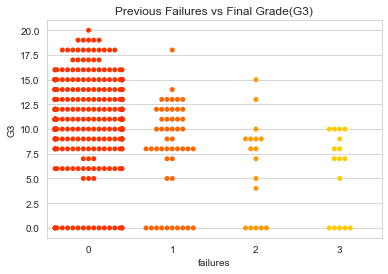

In [53]:
b = sns.swarmplot(x=df['failures'],y=stud['G3'],palette='autumn')
b.axes.set_title('Previous Failures vs Final Grade(G3)')

    Observation : Student with less previous failures usually score higher

### Family Education Attribute ( Fedu + Medu )

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\se

Text(0.5, 1.0, 'Family Education vs Final Grade(G3)')

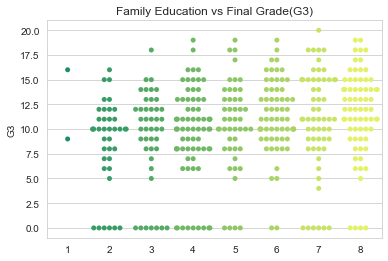

In [54]:
fa_edu = df['Fedu'] + df['Medu']
b = sns.swarmplot(x=fa_edu,y=df['G3'],palette='summer')
b.axes.set_title('Family Education vs Final Grade(G3)')

    Observation : Educated families result in higher grades

## Wish to go for Higher Education Attribute

Text(0.5, 1.0, 'Higher Education vs Final Grade(G3)')

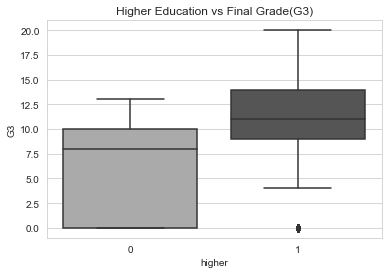

In [57]:
b = sns.boxplot(x=df['higher'],y=df['G3'],palette='binary')
b.axes.set_title('Higher Education vs Final Grade(G3)')

    Observation : Students who wish to go for higher studies score more

### Going Out with Friends Attribute

Text(0.5, 1.0, 'Go Out vs Final Grade(G3)')

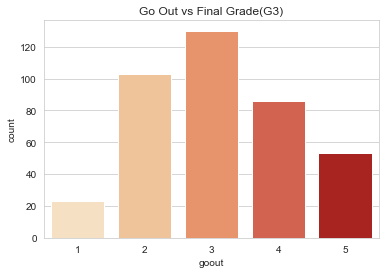

In [58]:
b = sns.countplot(x=df['goout'],palette='OrRd')
b.axes.set_title('Go Out vs Final Grade(G3)')

    Observation : The students have an average score when it comes to going out with friends.

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

13.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



Text(0.5, 1.0, 'Go Out vs Final Grade(G3)')

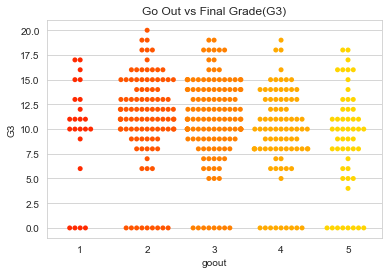

In [60]:
b = sns.swarmplot(x=df['goout'],y=df['G3'],palette='autumn')
b.axes.set_title('Go Out vs Final Grade(G3)')

    Observation : Students who go out a lot score less

### Romantic relationship Attribute

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



Text(0.5, 1.0, 'Romantic Relationship vs Final Grade(G3)')

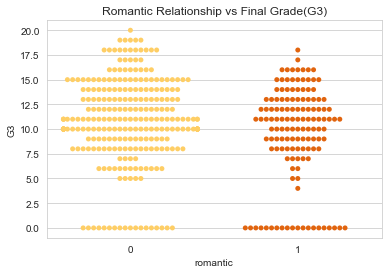

In [62]:
b = sns.swarmplot(x=df['romantic'],y=df['G3'],palette='YlOrBr')
b.axes.set_title('Romantic Relationship vs Final Grade(G3)')

    Here romantic attribute with value 0 means no relationship and value with 1 means in relationship
    *Observation : Students with no romantic relationship score higher

### Reason Attribute

Text(0.5, 1.0, 'Reason vs Students Count')

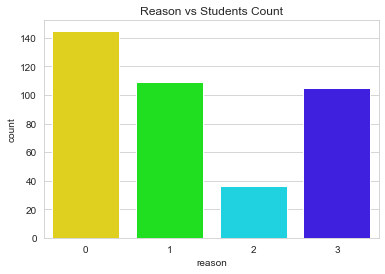

In [63]:
b = sns.countplot(x='reason',data=df,palette='gist_rainbow')    # Reason to choose this school
b.axes.set_title('Reason vs Students Count')

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



Text(0.5, 1.0, 'Reason vs Final grade')

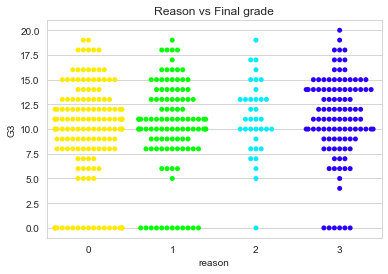

In [64]:
b = sns.swarmplot(x='reason', y='G3', data=df,palette='gist_rainbow')
b.axes.set_title('Reason vs Final grade')

    Observation : The students have an equally distributed average score when it comes to reason attribute.

# Machine Learning Algorithms

In [65]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [66]:
# splitting the data into training and testing data (75% and 25%)
# we mention the random state to achieve the same split everytime we run the code
X_train, X_test, y_train, y_test = train_test_split(df, df['G3'], test_size = 0.25, random_state=42)

In [67]:
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
16,0,0,16,1,0,1,4,4,3,3,...,3,2,3,1,2,2,6,13,14,14
66,0,1,15,1,0,0,4,4,2,3,...,1,3,3,5,5,3,4,13,13,12
211,0,1,17,1,1,1,4,4,3,2,...,5,3,5,4,5,3,13,12,12,13
7,0,0,17,1,0,0,4,4,2,4,...,4,1,4,1,1,1,6,6,5,6
19,0,1,16,1,1,1,4,3,1,2,...,3,1,3,1,3,5,4,8,10,10


## MAE - Mean Absolute Error & RMSE - Root Mean Square Error

In [68]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))

    return mae, rmse

In [69]:
# find the median
median_pred = X_train['G3'].median()

# create a list with all values as median
median_preds = [median_pred for _ in range(len(X_test))]

# store the true G3 values for passing into the function
true = X_test['G3']

In [70]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 3.7879
Median Baseline RMSE: 4.8252


In [71]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop('G3', axis='columns')
    X_test = X_test.drop('G3', axis='columns')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=100)
    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=50)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [72]:
results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse
Linear Regression,1.382405,2.137349
ElasticNet Regression,1.226473,2.060571
Random Forest,1.060505,1.709722
Extra Trees,1.13404,1.785018
SVM,1.854199,2.734869
Gradient Boosted,0.998259,1.696402
Baseline,3.787879,4.825228


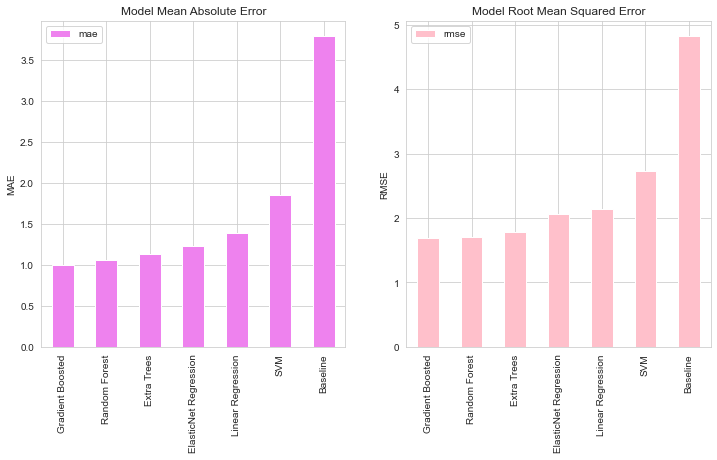

In [73]:
plt.figure(figsize=(12, 6))

# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'violet', ax = ax)
plt.title('Model Mean Absolute Error') 
plt.ylabel('MAE')

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'pink', ax = ax)
plt.title('Model Root Mean Squared Error') 
plt.ylabel('RMSE')

plt.show()

    Conclusion: As we see both Model Mean Absolute Error & Model Root Mean Squared Error that the linear regression is performing the best in both cases.